
🔍 Evaluasi Model [ANJURAN]
True Positives (TP): 0
True Negatives (TN): 1177
False Positives (FP): 0
False Negatives (FN): 223
-------------------------------
Akurasi: 0.8407
Presisi: 0.0000
Recall: 0.0000
F1-Score: 0.0000


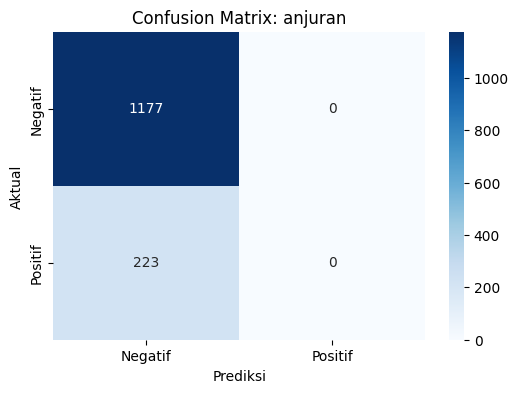


🔍 Evaluasi Model [LARANGAN]
True Positives (TP): 0
True Negatives (TN): 1218
False Positives (FP): 0
False Negatives (FN): 182
-------------------------------
Akurasi: 0.8700
Presisi: 0.0000
Recall: 0.0000
F1-Score: 0.0000


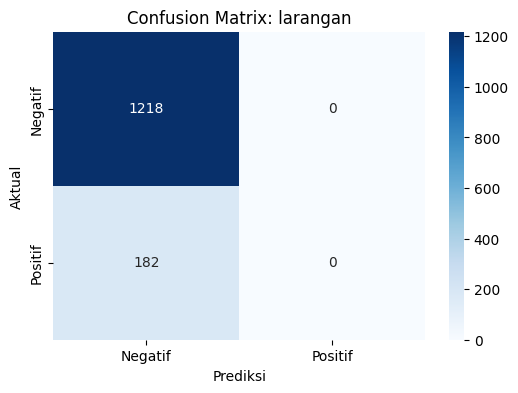


🔍 Evaluasi Model [INFORMASI]
True Positives (TP): 1262
True Negatives (TN): 0
False Positives (FP): 138
False Negatives (FN): 0
-------------------------------
Akurasi: 0.9014
Presisi: 0.9014
Recall: 1.0000
F1-Score: 0.9482


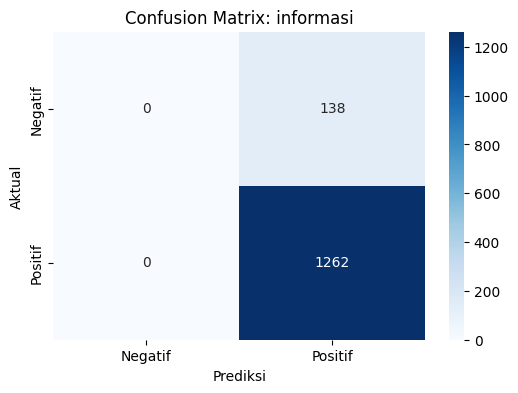


🌟 AKURASI KESELURUHAN: 0.8707


In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

class ManualLogisticRegression:
    def __init__(self, learning_rate=0.1, n_iter=1000):
        self.lr = learning_rate
        self.n_iter = n_iter
        self.weights = None
        self.bias = None
    
    @staticmethod
    def sigmoid(z):
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for _ in range(self.n_iter):
            linear_pred = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(linear_pred)
            
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)
            
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
    
    def predict(self, X, threshold=0.5):
        linear_pred = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(linear_pred)
        return (y_pred >= threshold).astype(int)


# ============================
# 1. FUNGSI EVALUASI MANUAL
# ============================
def hitung_confusion_matrix(y_true, y_pred):
    """Menghitung TP, TN, FP, FN secara manual"""
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    return tp, tn, fp, fn

def hitung_metrics(tp, tn, fp, fn):
    """Menghitung metrics evaluasi manual"""
    akurasi = (tp + tn) / (tp + tn + fp + fn) if (tp+tn+fp+fn) > 0 else 0
    presisi = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (presisi * recall) / (presisi + recall) if (presisi + recall) > 0 else 0
    return akurasi, presisi, recall, f1

def plot_confusion_matrix_manual(tp, tn, fp, fn, label):
    """Visualisasi confusion matrix manual"""
    cm = np.array([[tn, fp], 
                   [fn, tp]])
    
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Negatif', 'Positif'],
                yticklabels=['Negatif', 'Positif'])
    plt.title(f'Confusion Matrix: {label}')
    plt.xlabel('Prediksi')
    plt.ylabel('Aktual')
    plt.show()

# ============================
# 2. LOAD MODEL & DATA TEST
# ============================
with open("../models/manual_logreg_models.pkl", "rb") as f:
    models = pickle.load(f)

with open("../data/tfidf/tfidf_testing.pkl", "rb") as f:
    X_test = pickle.load(f).toarray()

df_test = pd.read_csv("../data/processed/preprocessed_testing.csv", delimiter=";")
y_test = df_test[['anjuran', 'larangan', 'informasi']].values

# ============================
# 3. EVALUASI TIAP LABEL
# ============================
akurasi_list = []  # Untuk menyimpan akurasi tiap label

for i, label in enumerate(['anjuran', 'larangan', 'informasi']):
    print(f"\n🔍 Evaluasi Model [{label.upper()}]")
    
    # Prediksi
    y_pred = models[label].predict(X_test)
    y_true = y_test[:, i]
    
    # Hitung metrics
    tp, tn, fp, fn = hitung_confusion_matrix(y_true, y_pred)
    akurasi, presisi, recall, f1 = hitung_metrics(tp, tn, fp, fn)
    akurasi_list.append(akurasi)  # Simpan akurasi
    
    # Tampilkan hasil
    print(f"True Positives (TP): {tp}")
    print(f"True Negatives (TN): {tn}")
    print(f"False Positives (FP): {fp}")
    print(f"False Negatives (FN): {fn}")
    print("-------------------------------")
    print(f"Akurasi: {akurasi:.4f}")
    print(f"Presisi: {presisi:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    
    # Visualisasi
    plot_confusion_matrix_manual(tp, tn, fp, fn, label)

# Hitung dan tampilkan akurasi keseluruhan
akurasi_keseluruhan = np.mean(akurasi_list)
print("\n=================================")
print(f"🌟 AKURASI KESELURUHAN: {akurasi_keseluruhan:.4f}")
print("=================================")

📊 Evaluasi untuk label 'anjuran':
  TP: 69, TN: 1132, FP: 45, FN: 154
  Accuracy : 0.8579
  Precision: 0.6053
  Recall   : 0.3094
  F1-Score : 0.4095
----------------------------------------


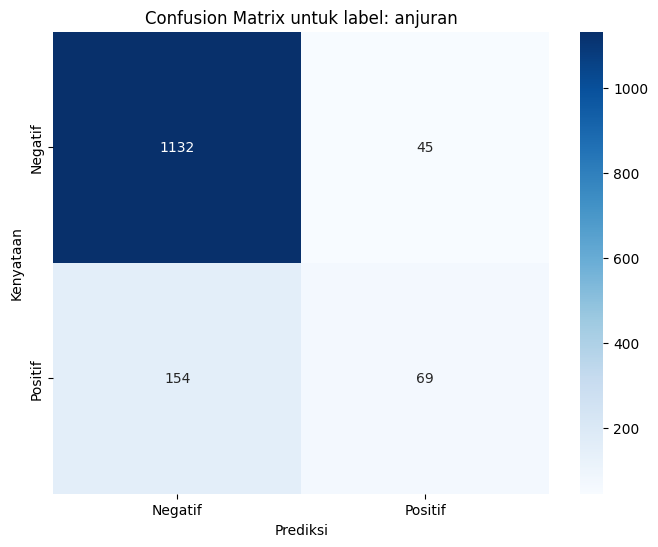

📊 Evaluasi untuk label 'larangan':
  TP: 121, TN: 1205, FP: 13, FN: 61
  Accuracy : 0.9471
  Precision: 0.9030
  Recall   : 0.6648
  F1-Score : 0.7658
----------------------------------------


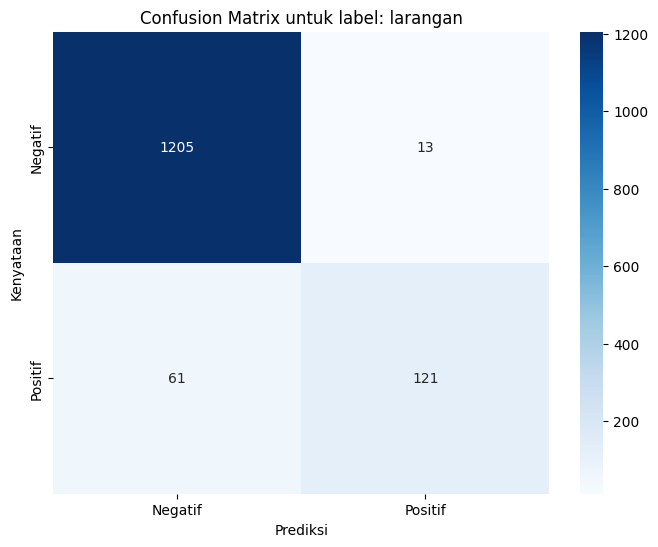

📊 Evaluasi untuk label 'informasi':
  TP: 1259, TN: 10, FP: 128, FN: 3
  Accuracy : 0.9064
  Precision: 0.9077
  Recall   : 0.9976
  F1-Score : 0.9505
----------------------------------------


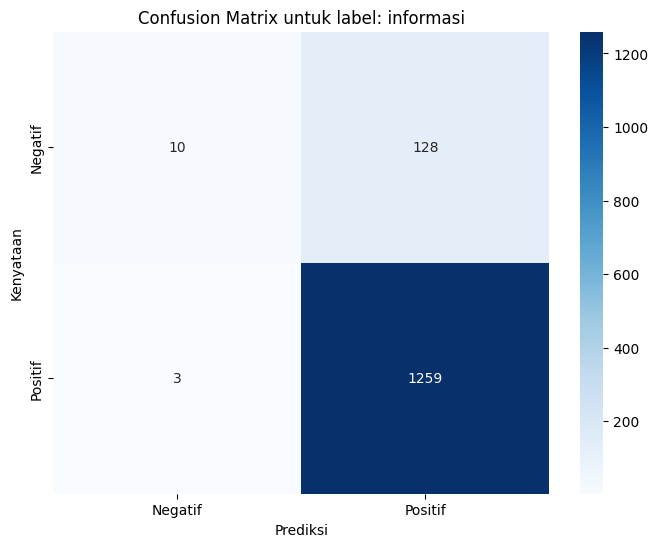


🌟 AKURASI KESELURUHAN MODEL: 0.9038

Hasil evaluasi telah disimpan ke '../notebooks/result_evaluation.json'


In [57]:
import json
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# -------------------------------
# 1. Load Model dan Data
# -------------------------------

# Load model SGD multi-label
with open("../models/sgd_logistic_regression.pkl", "rb") as f:
    model = pickle.load(f)

# Load TF-IDF data testing
with open("../data/tfidf/tfidf_testing.pkl", "rb") as f:
    X_test_tfidf = pickle.load(f)

# Load label testing
df_test = pd.read_csv("../data/processed/preprocessed_testing.csv", delimiter=";")
y_test = df_test[['anjuran', 'larangan', 'informasi']]

# -------------------------------
# 2. Prediksi
# -------------------------------
y_pred = model.predict(X_test_tfidf)

# -------------------------------
# 3. Fungsi Evaluasi Manual
# -------------------------------
def confusion(Y, Yp):
    tp = tn = fp = fn = 0
    for i in range(len(Y)):
        if Y[i] == 1 and Yp[i] == 1:
            tp += 1
        elif Y[i] == 0 and Yp[i] == 0:
            tn += 1
        elif Y[i] == 0 and Yp[i] == 1:
            fp += 1
        elif Y[i] == 1 and Yp[i] == 0:
            fn += 1
    return tp, tn, fp, fn

def calculate_metrics(tp, tn, fp, fn):
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp) if (tp + fp) != 0 else 0
    recall = tp / (tp + fn) if (tp + fn) != 0 else 0
    f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
    return accuracy, precision, recall, f1

# -------------------------------
# 4. Visualisasi Confusion Matrix
# -------------------------------
def plot_confusion_matrix(y_true, y_pred, label):
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=["Negatif", "Positif"], 
                yticklabels=["Negatif", "Positif"])
    plt.title(f'Confusion Matrix untuk label: {label}')
    plt.xlabel('Prediksi')
    plt.ylabel('Kenyataan')
    plt.show()

# -------------------------------
# 5. Evaluasi per Label dan Simpan ke JSON
# -------------------------------
labels = ['anjuran', 'larangan', 'informasi']
accuracies = []  # Untuk menyimpan akurasi tiap label
results = {}     # Untuk menyimpan semua hasil evaluasi

for i, label in enumerate(labels):
    y_true = y_test[label].tolist()
    y_pred_label = y_pred[:, i].tolist()

    tp, tn, fp, fn = confusion(y_true, y_pred_label)
    accuracy, precision, recall, f1 = calculate_metrics(tp, tn, fp, fn)
    accuracies.append(accuracy)  # Simpan akurasi

    # Simpan hasil evaluasi untuk label ini
    results[label] = {
        'true_positive': tp,
        'true_negative': tn,
        'false_positive': fp,
        'false_negative': fn,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }

    print(f"📊 Evaluasi untuk label '{label}':")
    print(f"  TP: {tp}, TN: {tn}, FP: {fp}, FN: {fn}")
    print(f"  Accuracy : {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall   : {recall:.4f}")
    print(f"  F1-Score : {f1:.4f}")
    print("-" * 40)

    # Plot confusion matrix
    plot_confusion_matrix(y_true, y_pred_label, label)

# Hitung akurasi keseluruhan
overall_accuracy = np.mean(accuracies)
results['overall_accuracy'] = overall_accuracy

print("\n=============================================")
print(f"🌟 AKURASI KESELURUHAN MODEL: {overall_accuracy:.4f}")
print("=============================================")

# Simpan hasil evaluasi ke file JSON
with open('../notebooks/result_evaluation.json', 'w') as f:
    json.dump(results, f, indent=4)

print("\nHasil evaluasi telah disimpan ke '../notebooks/result_evaluation.json'")

📊 Evaluasi untuk label 'anjuran':
  TP: 100, TN: 1090, FP: 87, FN: 123
  Accuracy : 0.8500
  Precision: 0.5348
  Recall   : 0.4484
  F1-Score : 0.4878
----------------------------------------


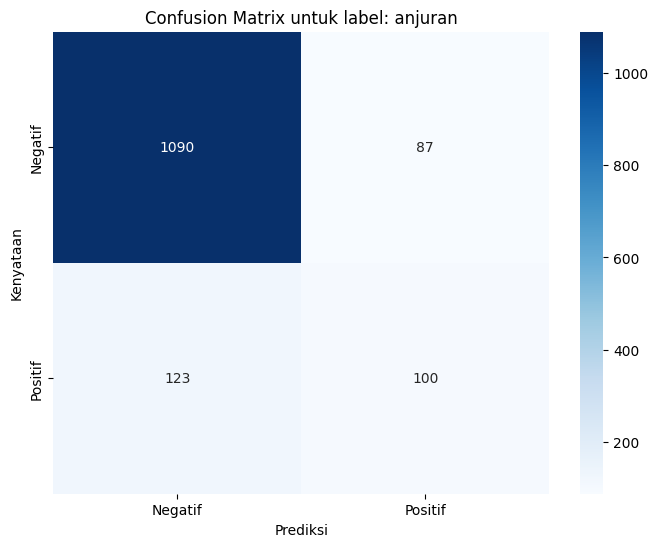

📊 Evaluasi untuk label 'larangan':
  TP: 140, TN: 1192, FP: 26, FN: 42
  Accuracy : 0.9514
  Precision: 0.8434
  Recall   : 0.7692
  F1-Score : 0.8046
----------------------------------------


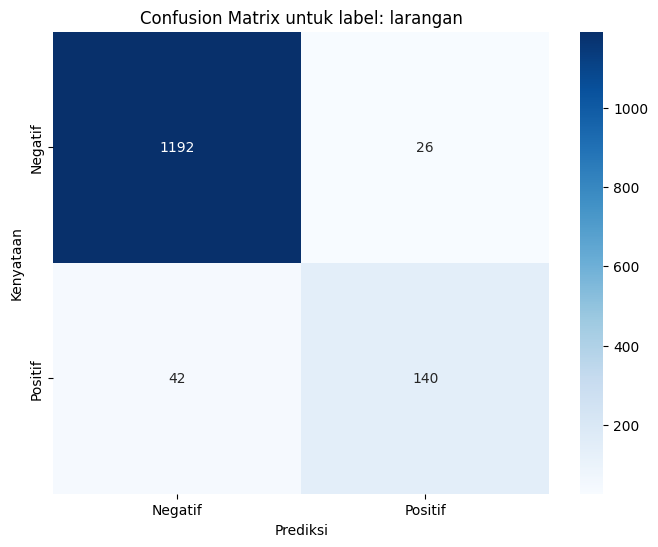

📊 Evaluasi untuk label 'informasi':
  TP: 1241, TN: 34, FP: 104, FN: 21
  Accuracy : 0.9107
  Precision: 0.9227
  Recall   : 0.9834
  F1-Score : 0.9521
----------------------------------------


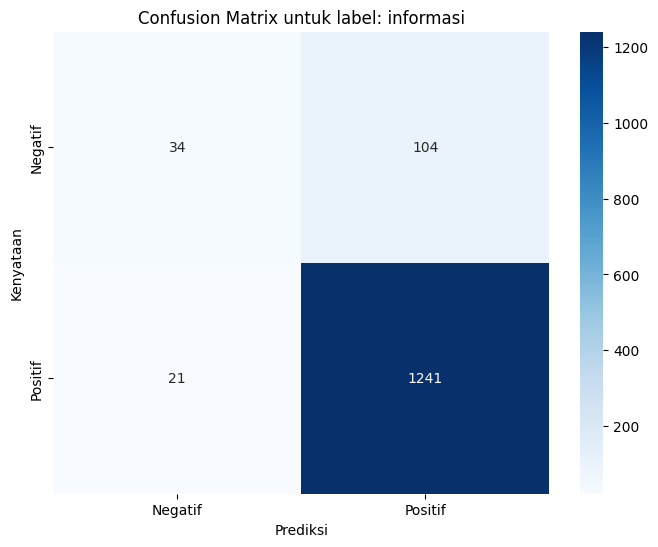


🌟 AKURASI KESELURUHAN MODEL: 0.9040

Hasil evaluasi telah disimpan ke '../notebooks/result_evaluation.json'


In [58]:
import json
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# -------------------------------
# 1. Load Model dan Data
# -------------------------------

# Load model SGD multi-label
with open("../models/sgd_logistic_regression_manual.pkl", "rb") as f:
    model = pickle.load(f)

# Load TF-IDF data testing
with open("../data/tfidf/tfidf_testing.pkl", "rb") as f:
    X_test_tfidf = pickle.load(f)

# Load label testing
df_test = pd.read_csv("../data/processed/preprocessed_testing.csv", delimiter=";")
y_test = df_test[['anjuran', 'larangan', 'informasi']]

# -------------------------------
# 2. Prediksi
# -------------------------------
y_pred = model.predict(X_test_tfidf)

# -------------------------------
# 3. Fungsi Evaluasi Manual
# -------------------------------
def confusion(Y, Yp):
    tp = tn = fp = fn = 0
    for i in range(len(Y)):
        if Y[i] == 1 and Yp[i] == 1:
            tp += 1
        elif Y[i] == 0 and Yp[i] == 0:
            tn += 1
        elif Y[i] == 0 and Yp[i] == 1:
            fp += 1
        elif Y[i] == 1 and Yp[i] == 0:
            fn += 1
    return tp, tn, fp, fn

def calculate_metrics(tp, tn, fp, fn):
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp) if (tp + fp) != 0 else 0
    recall = tp / (tp + fn) if (tp + fn) != 0 else 0
    f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
    return accuracy, precision, recall, f1

# -------------------------------
# 4. Visualisasi Confusion Matrix
# -------------------------------
def plot_confusion_matrix(y_true, y_pred, label):
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=["Negatif", "Positif"], 
                yticklabels=["Negatif", "Positif"])
    plt.title(f'Confusion Matrix untuk label: {label}')
    plt.xlabel('Prediksi')
    plt.ylabel('Kenyataan')
    plt.show()

# -------------------------------
# 5. Evaluasi per Label dan Simpan ke JSON
# -------------------------------
labels = ['anjuran', 'larangan', 'informasi']
accuracies = []  # Untuk menyimpan akurasi tiap label
results = {}     # Untuk menyimpan semua hasil evaluasi

for i, label in enumerate(labels):
    y_true = y_test[label].tolist()
    y_pred_label = y_pred[:, i].tolist()

    tp, tn, fp, fn = confusion(y_true, y_pred_label)
    accuracy, precision, recall, f1 = calculate_metrics(tp, tn, fp, fn)
    accuracies.append(accuracy)  # Simpan akurasi

    # Simpan hasil evaluasi untuk label ini
    results[label] = {
        'true_positive': tp,
        'true_negative': tn,
        'false_positive': fp,
        'false_negative': fn,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }

    print(f"📊 Evaluasi untuk label '{label}':")
    print(f"  TP: {tp}, TN: {tn}, FP: {fp}, FN: {fn}")
    print(f"  Accuracy : {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall   : {recall:.4f}")
    print(f"  F1-Score : {f1:.4f}")
    print("-" * 40)

    # Plot confusion matrix
    plot_confusion_matrix(y_true, y_pred_label, label)

# Hitung akurasi keseluruhan
overall_accuracy = np.mean(accuracies)
results['overall_accuracy'] = overall_accuracy

print("\n=============================================")
print(f"🌟 AKURASI KESELURUHAN MODEL: {overall_accuracy:.4f}")
print("=============================================")

# Simpan hasil evaluasi ke file JSON
with open('../notebooks/result_evaluation_manual.json', 'w') as f:
    json.dump(results, f, indent=4)

print("\nHasil evaluasi telah disimpan ke '../notebooks/result_evaluation.json'")

In [56]:
import pandas as pd
import pickle
from collections import defaultdict

# Load data
df_test_raw = pd.read_csv("../data/raw/data_testing.csv", delimiter=";")
df_test = pd.read_csv("../data/processed/preprocessed_testing.csv", delimiter=";")
y_test = df_test[['anjuran', 'larangan', 'informasi']]

with open("../data/tfidf/tfidf_testing.pkl", "rb") as f:
    X_test_tfidf = pickle.load(f)

# Load models
with open("../models/sgd_logistic_regression.pkl", "rb") as f:
    model_l2 = pickle.load(f)

with open("../models/sgd_logistic_regression_manual.pkl", "rb") as f:
    model_no_reg = pickle.load(f)

# Predictions
y_pred_l2 = model_l2.predict(X_test_tfidf)
y_pred_no_reg = model_no_reg.predict(X_test_tfidf)

# Initialize counters
correct_counts = {
    'l2': defaultdict(int),
    'no_reg': defaultdict(int)
}

# Find differences and count correct predictions
differences = []
for i in range(len(df_test_raw)):
    for j, label in enumerate(['anjuran', 'larangan', 'informasi']):
        actual = y_test.iloc[i, j]
        pred_l2 = y_pred_l2[i, j]
        pred_no_reg = y_pred_no_reg[i, j]
        
        # Count correct predictions
        if pred_l2 == actual:
            correct_counts['l2'][label] += 1
        if pred_no_reg == actual:
            correct_counts['no_reg'][label] += 1
        
        # Record differences
        if pred_l2 != pred_no_reg:
            differences.append({
                'text_raw': df_test_raw.iloc[i]['hadis'],
                'label': label,
                'actual': "Positif" if actual == 1 else "Negatif",
                'pred_l2': "Positif" if pred_l2 == 1 else "Negatif",
                'pred_no_reg': "Positif" if pred_no_reg == 1 else "Negatif",
                'which_correct': "L2" if pred_l2 == actual else ("No Reg" if pred_no_reg == actual else "Keduanya Salah")
            })

# Create summary DataFrame
summary_data = []
for label in ['anjuran', 'larangan', 'informasi']:
    summary_data.append({
        'Label': label,
        'L2 Correct': correct_counts['l2'][label],
        'No Reg Correct': correct_counts['no_reg'][label],
        'L2 Accuracy': f"{correct_counts['l2'][label]/len(df_test)*100:.1f}%",
        'No Reg Accuracy': f"{correct_counts['no_reg'][label]/len(df_test)*100:.1f}%"
    })

df_summary = pd.DataFrame(summary_data)
df_diff = pd.DataFrame(differences)

# Save results
df_diff.to_csv("../notebooks/different_predictions_with_comparison.csv", index=False, encoding='utf-8-sig')
df_summary.to_csv("../notebooks/model_comparison_summary.csv", index=False)

# Display results
print("===================================================")
print("PERBANDINGAN PERFORMA MODEL (TOTAL PREDIKSI BENAR)")
print("===================================================")
print(df_summary.to_markdown(index=False))

print("\n\n===================================================")
print(f"DITEMUKAN {len(df_diff)} KASUS PREDIKSI BERBEDA")
print("===================================================")
print(df_diff.head(10).to_markdown(index=False))

PERBANDINGAN PERFORMA MODEL (TOTAL PREDIKSI BENAR)
| Label     |   L2 Correct |   No Reg Correct | L2 Accuracy   | No Reg Accuracy   |
|:----------|-------------:|-----------------:|:--------------|:------------------|
| anjuran   |         1201 |             1190 | 85.8%         | 85.0%             |
| larangan  |         1326 |             1332 | 94.7%         | 95.1%             |
| informasi |         1269 |             1275 | 90.6%         | 91.1%             |


DITEMUKAN 151 KASUS PREDIKSI BERBEDA
| text_raw                                                                                                                                | label     | actual   | pred_l2   | pred_no_reg   | which_correct   |
|:----------------------------------------------------------------------------------------------------------------------------------------|:----------|:---------|:----------|:--------------|:----------------|
| membuang daging keledai jinak baik yang masih mentah maupun matang, da


📊 Evaluasi untuk label: anjuran
TP: 0, TN: 1177, FP: 0, FN: 223
✅ Accuracy : 0.8407
✅ Precision: 0.0000
✅ Recall   : 0.0000
✅ F1-Score : 0.0000


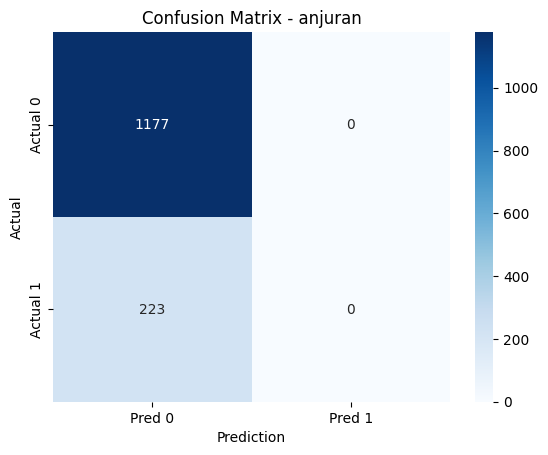


📊 Evaluasi untuk label: larangan
TP: 0, TN: 1218, FP: 0, FN: 182
✅ Accuracy : 0.8700
✅ Precision: 0.0000
✅ Recall   : 0.0000
✅ F1-Score : 0.0000


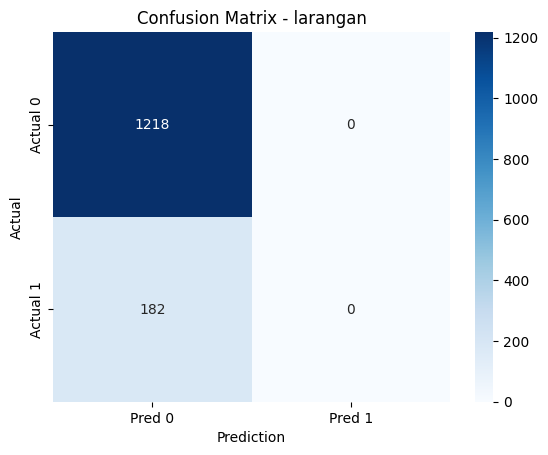


📊 Evaluasi untuk label: informasi
TP: 1262, TN: 0, FP: 138, FN: 0
✅ Accuracy : 0.9014
✅ Precision: 0.9014
✅ Recall   : 1.0000
✅ F1-Score : 0.9482


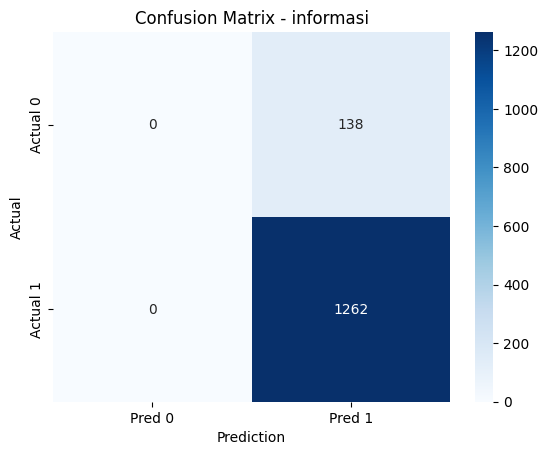


🌟 AKURASI KESELURUHAN MODEL: 0.8707


In [2]:
import math
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np  # ✅ Tambahan numpy

# --- Fungsi sigmoid manual ---
def sigmoid(z):
    return 1 / (1 + math.exp(-z))

# --- Fungsi dot product manual ---
def dot(x, w):
    return sum([x[i] * w[i] for i in range(len(w))])

# --- Fungsi konversi probabilitas ke label biner ---
def to_label(Yp):
    for i in range(len(Yp)):
        Yp[i] = 1 if Yp[i] > 0.5 else 0
    return Yp

# --- Fungsi confusion matrix ---
def confusion(Y, Yp):
    tp = tn = fp = fn = 0
    for i in range(len(Y)):
        if Y[i] == 1 and Yp[i] == 1:
            tp += 1
        elif Y[i] == 0 and Yp[i] == 0:
            tn += 1
        elif Y[i] == 0 and Yp[i] == 1:
            fp += 1
        elif Y[i] == 1 and Yp[i] == 0:
            fn += 1
    return tp, tn, fp, fn

# === Load model Logistic Regression manual dari file ===
with open("../models/LR_manual_jurnal.pkl", "rb") as f:
    models = pickle.load(f)

# === Load TF-IDF hasil preprocessing testing ===
with open("../data/tfidf/tfidf_testing.pkl", "rb") as f:
    X_test = pickle.load(f).toarray()

# === Load label ground truth testing ===
df_test = pd.read_csv("../data/processed/preprocessed_testing.csv", delimiter=";")
Y_test_all = df_test[['anjuran', 'larangan', 'informasi']].values

# === Evaluasi per label ===
total_accuracy = 0
label_count = 0

for idx, label in enumerate(['anjuran', 'larangan', 'informasi']):
    print(f"\n📊 Evaluasi untuk label: {label}")

    w, b = models[label]
    Y_true = Y_test_all[:, idx].astype(int).tolist()
    Yp_prob = []

    for i in range(len(Y_true)):
        z = dot(X_test[i], w) + b
        Yp_prob.append(sigmoid(z))

    Yp = to_label(Yp_prob.copy())

    # Hitung confusion matrix
    tp, tn, fp, fn = confusion(Y_true, Yp)

    # Hitung metrik evaluasi
    accuracy = (tp + tn) / (tp + tn + fp + fn) if (tp+tn+fp+fn) else 0
    precision = tp / (tp + fp) if (tp + fp) else 0
    recall = tp / (tp + fn) if (tp + fn) else 0
    f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) else 0

    total_accuracy += accuracy
    label_count += 1

    # Tampilkan hasil
    print(f"TP: {tp}, TN: {tn}, FP: {fp}, FN: {fn}")
    print(f"✅ Accuracy : {accuracy:.4f}")
    print(f"✅ Precision: {precision:.4f}")
    print(f"✅ Recall   : {recall:.4f}")
    print(f"✅ F1-Score : {f1_score:.4f}")

    # Visualisasi confusion matrix
    conf_matrix = np.array([[tn, fp],
                            [fn, tp]])  # ✅ pakai numpy array
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Pred 0", "Pred 1"],
                yticklabels=["Actual 0", "Actual 1"])
    plt.title(f"Confusion Matrix - {label}")
    plt.xlabel("Prediction")
    plt.ylabel("Actual")
    plt.show()

# === Akurasi keseluruhan rata-rata dari semua label ===
overall_accuracy = total_accuracy / label_count if label_count else 0

print("\n=============================================")
print(f"🌟 AKURASI KESELURUHAN MODEL: {overall_accuracy:.4f}")
print("=============================================")


In [3]:
import pandas as pd
import pickle
from collections import defaultdict
from math import exp

# --- Fungsi sigmoid dan dot manual ---
def sigmoid(z):
    return 1 / (1 + exp(-z))

def dot(x, w):
    return sum([x[i] * w[i] for i in range(len(w))])

# Load data
df_test_raw = pd.read_csv("../data/raw/data_testing.csv", delimiter=";")
df_test = pd.read_csv("../data/processed/preprocessed_testing.csv", delimiter=";")
y_test = df_test[['anjuran', 'larangan', 'informasi']]

with open("../data/tfidf/tfidf_testing.pkl", "rb") as f:
    X_test_tfidf = pickle.load(f).toarray()  # Konversi ke array agar bisa diiterasi manual

# Load models
with open("../models/LR_manual_jurnal.pkl", "rb") as f:
    model_manual = pickle.load(f)  # Ini akan menggantikan y_pred_l2

with open("../models/sgd_logistic_regression_manual.pkl", "rb") as f:
    model_no_reg = pickle.load(f)

# --- Prediksi manual dari LR_manual_jurnal.pkl ---
y_pred_manual = []
for i in range(len(X_test_tfidf)):
    row_preds = []
    for label in ['anjuran', 'larangan', 'informasi']:
        w, b = model_manual[label]
        z = dot(X_test_tfidf[i], w) + b
        prob = sigmoid(z)
        label_pred = 1 if prob > 0.5 else 0
        row_preds.append(label_pred)
    y_pred_manual.append(row_preds)

# --- Prediksi dari model no regularisasi ---
y_pred_no_reg = model_no_reg.predict(X_test_tfidf)

# --- Inisialisasi penghitung akurasi ---
correct_counts = {
    'manual': defaultdict(int),
    'no_reg': defaultdict(int)
}

# --- Bandingkan prediksi ---
differences = []
for i in range(len(df_test_raw)):
    for j, label in enumerate(['anjuran', 'larangan', 'informasi']):
        actual = y_test.iloc[i, j]
        pred_manual = y_pred_manual[i][j]
        pred_no_reg = y_pred_no_reg[i, j]
        
        # Hitung yang benar
        if pred_manual == actual:
            correct_counts['manual'][label] += 1
        if pred_no_reg == actual:
            correct_counts['no_reg'][label] += 1
        
        # Catat perbedaan prediksi
        if pred_manual != pred_no_reg:
            differences.append({
                'text_raw': df_test_raw.iloc[i]['hadis'],
                'label': label,
                'actual': "Positif" if actual == 1 else "Negatif",
                'pred_manual': "Positif" if pred_manual == 1 else "Negatif",
                'pred_no_reg': "Positif" if pred_no_reg == 1 else "Negatif",
                'which_correct': "Manual" if pred_manual == actual else ("No Reg" if pred_no_reg == actual else "Keduanya Salah")
            })

# --- Ringkasan hasil ---
summary_data = []
for label in ['anjuran', 'larangan', 'informasi']:
    summary_data.append({
        'Label': label,
        'Manual Correct': correct_counts['manual'][label],
        'No Reg Correct': correct_counts['no_reg'][label],
        'Manual Accuracy': f"{correct_counts['manual'][label]/len(df_test)*100:.1f}%",
        'No Reg Accuracy': f"{correct_counts['no_reg'][label]/len(df_test)*100:.1f}%"
    })

df_summary = pd.DataFrame(summary_data)
df_diff = pd.DataFrame(differences)

# --- Simpan ke CSV ---
df_diff.to_csv("../notebooks/different_predictions_with_comparison.csv", index=False, encoding='utf-8-sig')
df_summary.to_csv("../notebooks/model_comparison_summary.csv", index=False)

# --- Tampilkan hasil ---
print("===================================================")
print("PERBANDINGAN PERFORMA MODEL (TOTAL PREDIKSI BENAR)")
print("===================================================")
print(df_summary.to_markdown(index=False))

print("\n\n===================================================")
print(f"DITEMUKAN {len(df_diff)} KASUS PREDIKSI BERBEDA")
print("===================================================")
print(df_diff.head(10).to_markdown(index=False))


PERBANDINGAN PERFORMA MODEL (TOTAL PREDIKSI BENAR)
| Label     |   Manual Correct |   No Reg Correct | Manual Accuracy   | No Reg Accuracy   |
|:----------|-----------------:|-----------------:|:------------------|:------------------|
| anjuran   |             1177 |             1190 | 84.1%             | 85.0%             |
| larangan  |             1218 |             1332 | 87.0%             | 95.1%             |
| informasi |             1262 |             1275 | 90.1%             | 91.1%             |


DITEMUKAN 408 KASUS PREDIKSI BERBEDA
| text_raw                                                                                                                                 | label    | actual   | pred_manual   | pred_no_reg   | which_correct   |
|:-----------------------------------------------------------------------------------------------------------------------------------------|:---------|:---------|:--------------|:--------------|:----------------|
| melarang hasil (menjua


📊 Evaluasi untuk label: anjuran
TP: 223, TN: 0, FP: 1177, FN: 0
✅ Accuracy : 0.1593
✅ Precision: 0.1593
✅ Recall   : 1.0000
✅ F1-Score : 0.2748


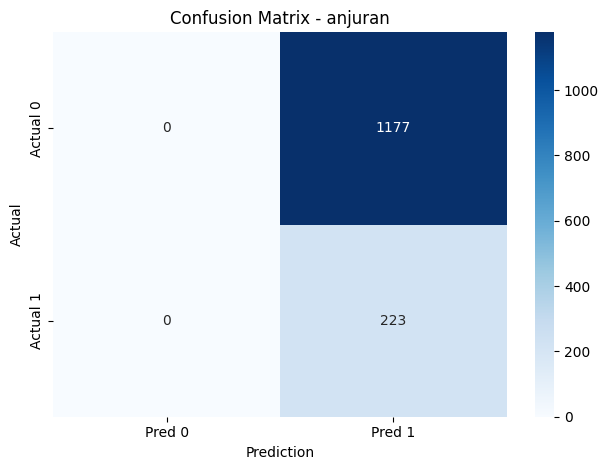


📊 Evaluasi untuk label: larangan
TP: 182, TN: 0, FP: 1218, FN: 0
✅ Accuracy : 0.1300
✅ Precision: 0.1300
✅ Recall   : 1.0000
✅ F1-Score : 0.2301


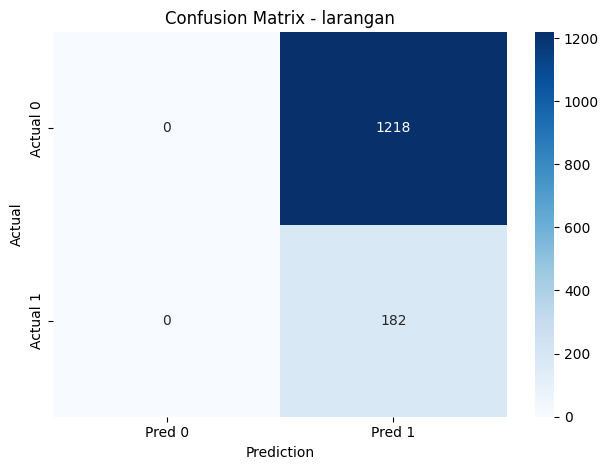


📊 Evaluasi untuk label: informasi
TP: 0, TN: 138, FP: 0, FN: 1262
✅ Accuracy : 0.0986
✅ Precision: 0.0000
✅ Recall   : 0.0000
✅ F1-Score : 0.0000


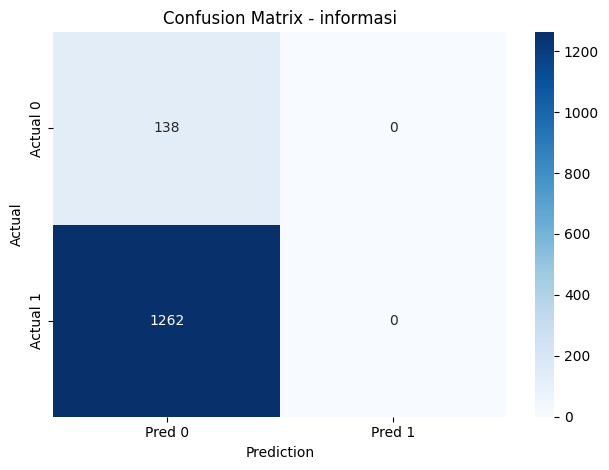


🌟 AKURASI KESELURUHAN MODEL: 0.1293


In [4]:
import math
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# --- Fungsi sigmoid manual ---
def sigmoid(z):
    return 1 / (1 + math.exp(-z))

# --- Fungsi dot product manual ---
def dot(x, w):
    return sum([x[i] * w[i] for i in range(len(w))])

# --- Fungsi konversi probabilitas ke label biner ---
def to_label(Yp, threshold=0.5):
    return [1 if p > threshold else 0 for p in Yp]

# --- Fungsi confusion matrix manual ---
def confusion(Y, Yp):
    tp = tn = fp = fn = 0
    for i in range(len(Y)):
        if Y[i] == 1 and Yp[i] == 1:
            tp += 1
        elif Y[i] == 0 and Yp[i] == 0:
            tn += 1
        elif Y[i] == 0 and Yp[i] == 1:
            fp += 1
        elif Y[i] == 1 and Yp[i] == 0:
            fn += 1
    return tp, tn, fp, fn

# === Load model Logistic Regression manual terbaru ===
with open("../models/LR_manual_jurnal_np.pkl", "rb") as f:
    models = pickle.load(f)

# === Load TF-IDF hasil preprocessing testing ===
with open("../data/tfidf/tfidf_testing.pkl", "rb") as f:
    X_test = pickle.load(f).toarray()

# === Load label ground truth testing ===
df_test = pd.read_csv("../data/processed/preprocessed_testing.csv", delimiter=";")
Y_test_all = df_test[['anjuran', 'larangan', 'informasi']].values

# === Evaluasi per label ===
total_accuracy = 0
label_count = 0

for idx, label in enumerate(['anjuran', 'larangan', 'informasi']):
    print(f"\n📊 Evaluasi untuk label: {label}")

    w, b = models[label]
    Y_true = Y_test_all[:, idx].astype(int).tolist()
    Yp_prob = []

    # Hitung probabilitas prediksi untuk semua dokumen
    for i in range(len(Y_true)):
        z = dot(X_test[i], w) + b
        Yp_prob.append(sigmoid(z))

    # Konversi ke label (threshold 0.5 sesuai jurnal)
    Yp = to_label(Yp_prob)

    # Hitung confusion matrix
    tp, tn, fp, fn = confusion(Y_true, Yp)

    # Hitung metrik evaluasi
    accuracy = (tp + tn) / (tp + tn + fp + fn) if (tp + tn + fp + fn) else 0
    precision = tp / (tp + fp) if (tp + fp) else 0
    recall = tp / (tp + fn) if (tp + fn) else 0
    f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) else 0

    total_accuracy += accuracy
    label_count += 1

    # Tampilkan hasil
    print(f"TP: {tp}, TN: {tn}, FP: {fp}, FN: {fn}")
    print(f"✅ Accuracy : {accuracy:.4f}")
    print(f"✅ Precision: {precision:.4f}")
    print(f"✅ Recall   : {recall:.4f}")
    print(f"✅ F1-Score : {f1_score:.4f}")

    # Visualisasi confusion matrix
    conf_matrix = np.array([[tn, fp],
                            [fn, tp]])
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Pred 0", "Pred 1"],
                yticklabels=["Actual 0", "Actual 1"])
    plt.title(f"Confusion Matrix - {label}")
    plt.xlabel("Prediction")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

# === Akurasi keseluruhan rata-rata dari semua label ===
overall_accuracy = total_accuracy / label_count if label_count else 0

print("\n=============================================")
print(f"🌟 AKURASI KESELURUHAN MODEL: {overall_accuracy:.4f}")
print("=============================================")
